# Sanity Check

**Idea:** Open the .h5 files you're saving and make sure that you have the correct information getting saved.

In [1]:
import h5py 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#fname = "../../../training-dataset-dumper/ttbar_pflow_jf_trks.h5"
fname = "../../../training-dataset-dumper/ttbar_jf_mini.h5"

f = h5py.File(fname,'r')
jet_np = f['jets'][:]
trk_np = f['tracks'][:]
f.close()

jet_df = pd.DataFrame(jet_np)

In [3]:
trk_np.shape

(418, 40)

In [4]:
trk_np.dtype

dtype([('chiSquared', '<f4'), ('numberDoF', '<f4'), ('IP3D_signed_d0', '<f4'), ('IP2D_signed_d0', '<f4'), ('IP3D_signed_z0', '<f4'), ('IP3D_signed_d0_significance', '<f4'), ('IP3D_signed_z0_significance', '<f4'), ('btag_ip_d0', '<f4'), ('btag_ip_z0', '<f4'), ('phi', '<f4'), ('theta', '<f4'), ('qOverP', '<f4'), ('IP2D_grade', '<i4'), ('IP3D_grade', '<i4'), ('numberOfInnermostPixelLayerHits', 'u1'), ('numberOfNextToInnermostPixelLayerHits', 'u1'), ('numberOfInnermostPixelLayerSharedHits', 'u1'), ('numberOfInnermostPixelLayerSplitHits', 'u1'), ('numberOfPixelHits', 'u1'), ('numberOfPixelHoles', 'u1'), ('numberOfPixelSharedHits', 'u1'), ('numberOfPixelSplitHits', 'u1'), ('numberOfSCTHits', 'u1'), ('numberOfSCTHoles', 'u1'), ('numberOfSCTSharedHits', 'u1'), ('pt', '<f4'), ('eta', '<f4'), ('deta', '<f4'), ('dphi', '<f4'), ('dr', '<f4'), ('ptfrac', '<f4')])

Plot the variables you are applying the new cuts on:
- $d_0$
- $z_0 \sin (\theta)$
- $p_T$ (need to convert to GeV)

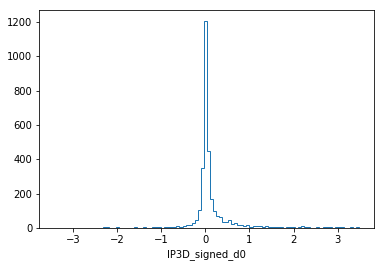

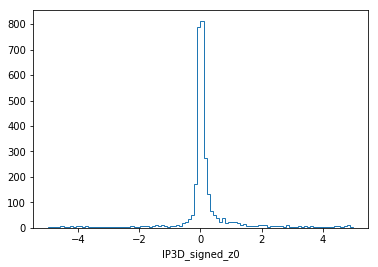

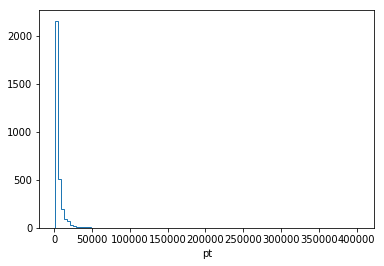

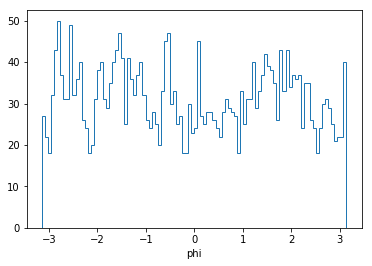

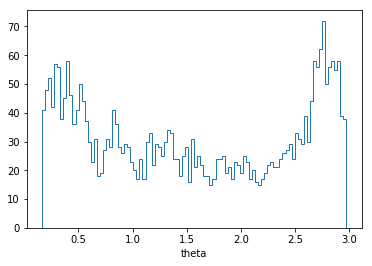

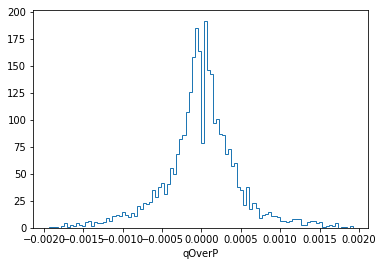

In [10]:
for v in ['IP3D_signed_d0','IP3D_signed_z0','pt','phi','theta','qOverP']:
    
    var = np.nan_to_num(trk_np[v])
    var = var[var != 0]
    
    plt.figure()
    plt.hist(var,100,histtype='step')#),log=True)
    plt.xlabel(v)
    
plt.show()
    

In [6]:
trk_np[['IP3D_signed_d0','btag_ip_d0']]

array([[( 2.0679747e-01,  2.0679747e-01),
        ( 2.2282381e-01,  2.2282381e-01),
        (-2.1633606e-02, -2.1633606e-02), ...,
        (           nan,            nan),
        (           nan,            nan),
        (           nan,            nan)],
       [( 1.5552415e+00, -1.5552415e+00),
        (-3.8115218e-01, -3.8115218e-01),
        ( 2.6125520e-01,  2.6125520e-01), ...,
        (           nan,            nan),
        (           nan,            nan),
        (           nan,            nan)],
       [( 2.2922034e+00,  2.2922034e+00),
        ( 4.6628773e-02,  4.6628773e-02),
        ( 1.2030416e+00,  1.2030416e+00), ...,
        (           nan,            nan),
        (           nan,            nan),
        (           nan,            nan)],
       ...,
       [(-4.4266459e-01, -4.4266459e-01),
        ( 1.5842967e-02, -1.5842967e-02),
        (-6.0563177e-02, -6.0563177e-02), ...,
        (           nan,            nan),
        (           nan,            nan),

In [7]:
trk_np[['IP3D_signed_z0','btag_ip_z0']]

array([[( 1.2632525 , -1.2632525 ), ( 3.4655583 , -3.4655583 ),
        ( 0.0081279 ,  0.0081279 ), ..., (        nan,         nan),
        (        nan,         nan), (        nan,         nan)],
       [( 0.2405692 ,  0.2405692 ), ( 0.03855268,  0.03855268),
        ( 4.502809  , -4.502809  ), ..., (        nan,         nan),
        (        nan,         nan), (        nan,         nan)],
       [(-0.5798354 , -0.5798354 ), (-0.03418198,  0.03418198),
        ( 0.04870531,  0.04870531), ..., (        nan,         nan),
        (        nan,         nan), (        nan,         nan)],
       ...,
       [( 0.50155777, -0.50155777), ( 0.02339446, -0.02339446),
        (-0.1116145 ,  0.1116145 ), ..., (        nan,         nan),
        (        nan,         nan), (        nan,         nan)],
       [(-0.1129632 , -0.1129632 ), ( 0.7692948 , -0.7692948 ),
        (-0.02499431,  0.02499431), ..., (        nan,         nan),
        (        nan,         nan), (        nan,         nan)]

In [39]:
np.min(var),np.max(var)

(500.00308, 2320160.2)

In [16]:
np.nan_to_num(trk_np['IP2D_signed_d0'] ).shape

(6790, 15)

In [17]:
6790*15

101850

In [18]:
differernt = np.nan_to_num(trk_np['IP2D_signed_d0'] ) != np.nan_to_num(trk_np['IP3D_signed_d0'])

In [20]:
trk_np['IP2D_signed_d0'][differernt]

array([-0.00270545, -0.02663116,  0.15318862, ...,  0.06541952,
        0.04120616,  0.05180989], dtype=float32)

In [21]:
trk_np['IP3D_signed_d0'][differernt]

array([ 0.00270545,  0.02663116, -0.15318862, ..., -0.06541952,
       -0.04120616, -0.05180989], dtype=float32)

In [15]:
np.sum(np.nan_to_num(trk_np['IP2D_signed_d0'] ) != np.nan_to_num(trk_np['IP3D_signed_d0']))

13433

In [ ]:
np.sum(np.nan_to_num(trk_np['IP2D_signed_d0'] ) != np.nan_to_num(trk_np['IP3D_signed_d0']))

In [13]:
np.nan_to_num(trk_np['IP3D_signed_d0'])

array([[ 1.2762167 ,  0.7858457 ,  0.43660727, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58630776,  0.34277093,  0.02663116, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.2916117 ,  0.29370958,  0.05393045, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.07246611,  0.00962843,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02613573,  0.04472004,  0.02951106, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12914875,  0.08709735, -0.06541952, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [29]:
np.sign(np.nan)

nan

In [30]:
proj_signs = np.sign(np.nan_to_num(trk_np['IP3D_signed_d0'] )) != np.sign(np.nan_to_num(trk_np['IP3D_signed_z0']))

In [31]:
proj_signs.sum()

9010

In [32]:
trk_np['IP3D_signed_d0'][proj_signs]

array([ 1.2762167 , -0.39698562,  3.2916117 , ..., -0.12517883,
        0.04254477,  0.02613573], dtype=float32)

In [33]:
trk_np['IP3D_signed_z0'][proj_signs]

array([-0.23044421,  0.06988036, -0.3089788 , ...,  0.21000645,
       -0.01974447, -0.00450446], dtype=float32)

In [ ]:
for v 
    plt.hist(trk_np[''])